<a href="https://colab.research.google.com/github/bun760/gemini-llm/blob/main/StackOverFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install swifter


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=1a71c49b55f3cac1ae7deb92a483f40306f02bc49ac0ac535a0678c45347ea41
  Stored in directory: /root/.cache/pip/wheels/d9/31/ff/ff51141a088571a9f672449e5aad5ea8bb35ca5d95ba135f30
Successfully built swifter


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import re
import html
import string
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#import swifter


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive

tags = pd.read_csv('Tags.csv', nrows=2000)
questions = pd.read_csv('Questions.csv', encoding="ISO-8859-1", nrows=2000)
ans = pd.read_csv('Answers.csv',encoding="ISO-8859-1", nrows=2000)


In [ ]:
print("Tags length     :", len(tags))
print("Questions length:", len(questions))
print("Answers length  :", len(ans))


Tags length     : 2000
Questions length: 2000
Answers length  : 2000


In [ ]:
temp_df = pd.DataFrame(tags['Tag'].value_counts())
temp_df.reset_index(inplace=True)
top10 = temp_df.head(10)
top10


,Tag,count
0,c#,89
1,.net,87
2,asp.net,53
3,sql-server,43
4,c++,37
5,sql,36
6,java,33
7,javascript,27
8,database,22
9,visual-studio,22


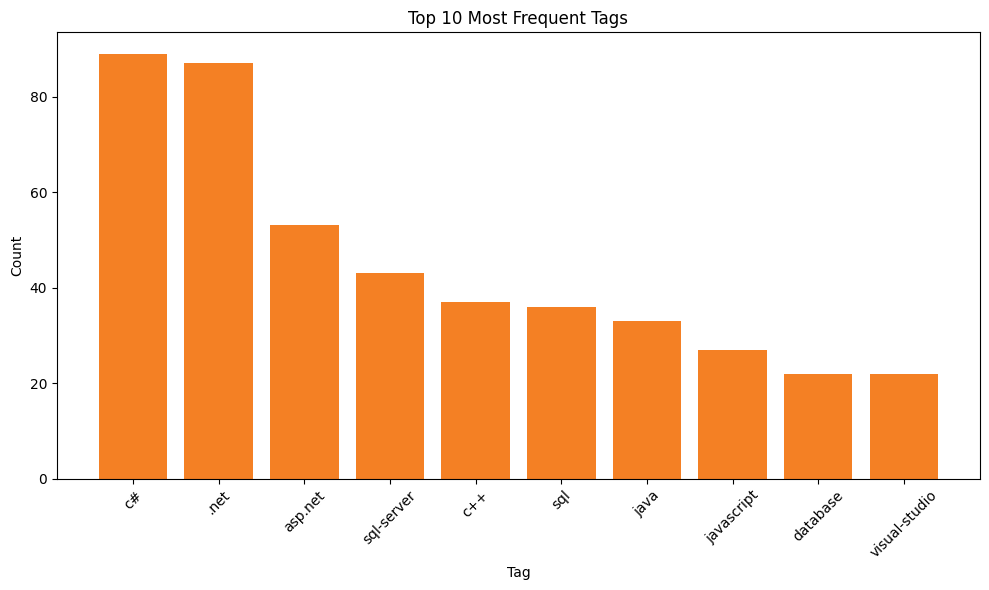

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top10['Tag'], top10['count'], color='#f48024')
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Tags')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
temp_df = pd.DataFrame(tags['Tag'].value_counts())
print('Total Number of Unique Tags: ' ,len(temp_df))
temp_df.reset_index(inplace=True)
print('Total Number of Unique Tags After Filtering: ' ,len(temp_df[temp_df['count']>1000]))
temp_df[temp_df['count']>1000].head(0)


Total Number of Unique Tags:  770
Total Number of Unique Tags After Filtering:  0


,Tag,count


In [ ]:
results = pd.merge( tags,temp_df, on='Tag')
results = results[results['count'] > 1000]
results = results.sort_values(by='Id', ascending=True)
tags_used = results['Tag']
print(len(results))
results.head(10)


0


,Id,Tag,count


In [ ]:
tags_used = tags_used.unique()
tags_used


array([], dtype=object)

In [ ]:
final_tags = results.groupby('Id')['Tag'].apply(lambda x: ' '.join(sorted(x.unique()))).reset_index()
#results = pd.merge( tags,temp_df, on='Tag')
#final_tags = results.groupby('Id')['Tag']
final_tags.head()

,Id,Tag


In [ ]:
final_tags = results.groupby('Id')['Tag'].apply(lambda x: ' '.join(sorted(x.unique()))).reset_index()
final_tags.head()

,Id,Tag


In [ ]:
display(tags.head(2))
display(questions.head(2))
display(ans.head(2))

,Id,Tag
0,80,flex
1,80,actionscript-3


,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...


,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,92,61.0,2008-08-01T14:45:37Z,90,13,"<p><a href=""http://svnbook.red-bean.com/"">Vers..."
1,124,26.0,2008-08-01T16:09:47Z,80,12,<p>I wound up using this. It is a kind of a ha...


In [ ]:
answer_counts = ans['ParentId'].value_counts().reset_index()
answer_counts.columns = ['Id', 'AnswerCount']    #relabelling
specific_answer = ans[ans['ParentId'] == 90]

print(specific_answer)

print(ans[ans['Id'] == 124])


   Id  OwnerUserId          CreationDate  ParentId  Score  \
0  92         61.0  2008-08-01T14:45:37Z        90     13   

                                                Body  
0  <p><a href="http://svnbook.red-bean.com/">Vers...  
    Id  OwnerUserId          CreationDate  ParentId  Score  \
1  124         26.0  2008-08-01T16:09:47Z        80     12   

                                                Body  
1  <p>I wound up using this. It is a kind of a ha...  


In [28]:
#ans2 = pd.read_csv('Answers.csv',encoding="ISO-8859-1",  nrows=2000)
colnames = pd.read_csv('Answers.csv', encoding="ISO-8859-1", nrows=0).columns
ans2 = pd.read_csv(
    'Answers.csv',
    encoding="ISO-8859-1",
    header=None,         # Tell pandas there's no header in this chunk.
    skiprows=2001,       # Skip the header (1) + the first 2000 data rows.
    nrows=2000,          # Read the next 2000 rows (2001 to 4000).
   names=colnames       # Apply the correct column names.
)
ans2['CreationDate'] = pd.to_datetime(ans2['CreationDate'])
unique_counts_by_date = ans2.groupby(ans2['CreationDate'].dt.date)['ParentId'].nunique().reset_index()
display(unique_counts_by_date.head(3))

,CreationDate,ParentId
0,2008-09-03,4
1,2008-09-04,43
2,2008-09-05,36


In [ ]:
metrics_df = pd.merge(question_views, answer_counts, on='Id', how='left')
